<a href="https://colab.research.google.com/github/smasterparth/opencv/blob/master/Time_Series_ETS_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ETS (Error-Trend-Seasonality) Models will take each of those terms for SMOOTHING  & may add them, mulitply them or even just leave some of them out.

In [0]:
import numpy as numpy 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('airline_passengers.csv' , parse_dates = True , index_col = 0)

In [3]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
df.index.freq = 'MS'

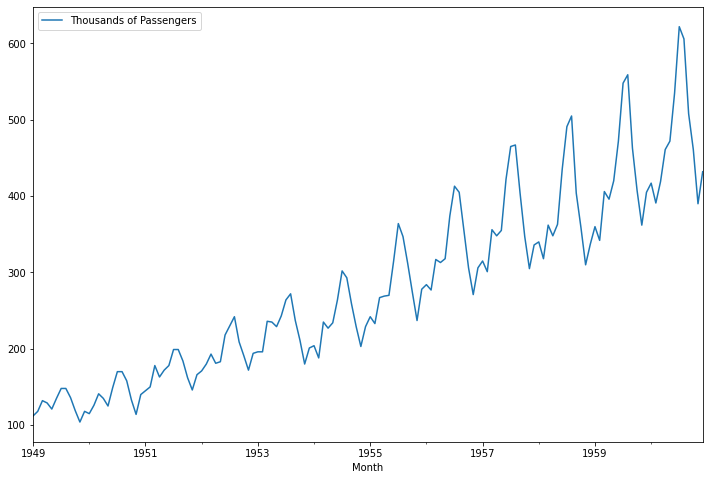

In [5]:
df.plot(figsize=(12,8))

# Seasonal_decompose Plots

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
result = seasonal_decompose(df['Thousands of Passengers'] , model='add')


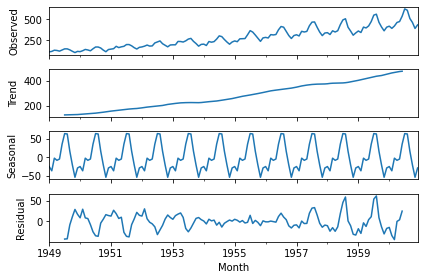

In [9]:
result.plot();

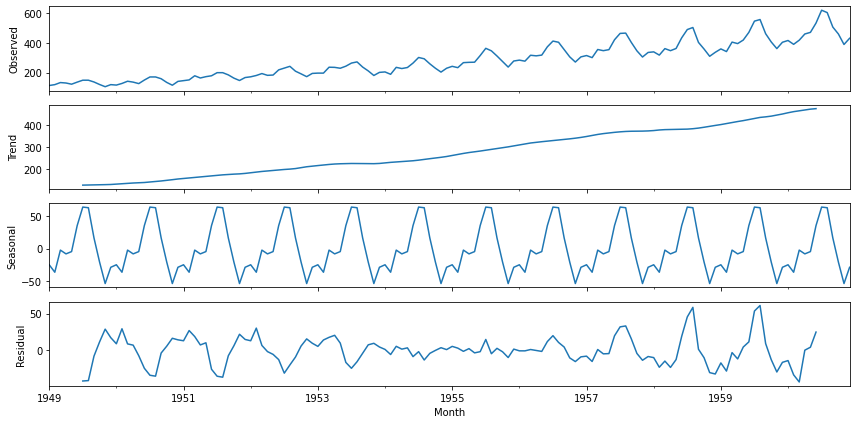

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

result.plot();

# SMA - Simple Moving Average

EWMA is an extension to SMA

An issue with SMA is that the entire model will be limited to the same window size.

SMA does not inform you about the future behaviour, it simply describe trends in data. 

EWMA reduces the lag effect from SMA & puts more weights on values that occurred more recently.

In [0]:
df['6-month SMA '] = df['Thousands of Passengers'].rolling(window=6).mean()

In [13]:
df.head(10)

,Thousands of Passengers,6-month SMA
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,124.500000
1949-07-01,148,130.500000
1949-08-01,148,135.500000
1949-09-01,136,136.166667


In [0]:
df['12-month SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

In [15]:
df.head(14)

,Thousands of Passengers,6-month SMA,12-month SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


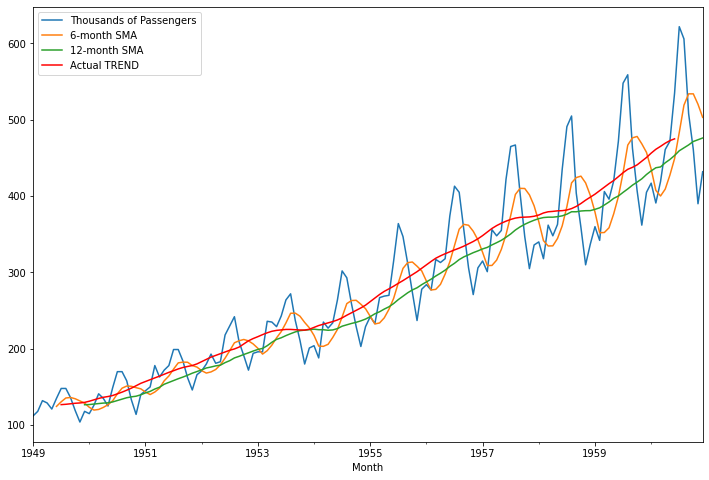

In [19]:
df.plot(figsize=(12,8))
result.trend.plot(color='red' , legend=True, label='Actual TREND')

# EWMA

In [0]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span = 12).mean()

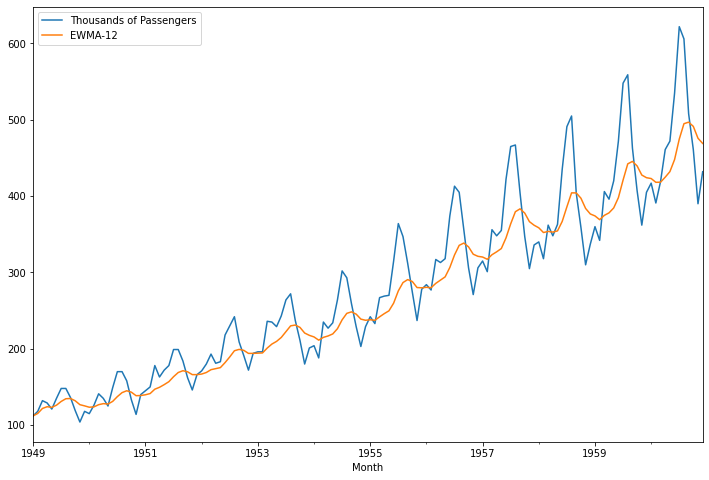

In [21]:
df[['Thousands of Passengers' , 'EWMA-12']].plot(figsize=(12,8))

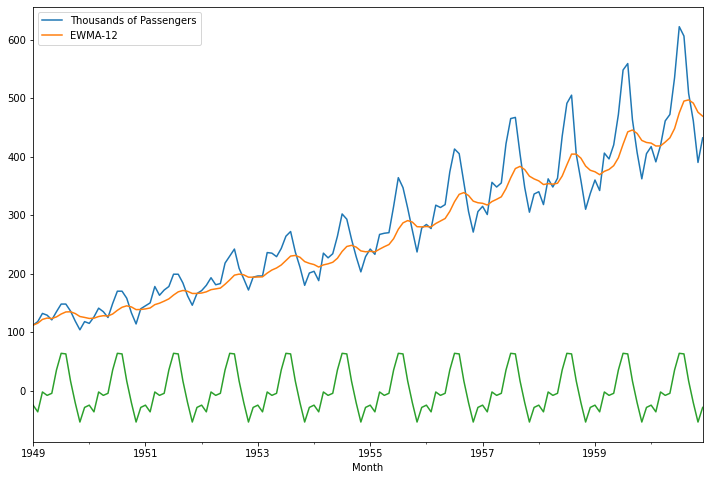

In [22]:
df[['Thousands of Passengers' , 'EWMA-12']].plot(figsize=(12,8))
result.seasonal.plot()

# Holt Winters Method

It comprises of the forecast equation & 3 smoothing equations

One for the LEVEL, one for the TREND & other is for the SEASONALITY , with smoothing parameters - alpha, beta & gamma resp.

There are 2 variations to this method that differ in the nature of seasonal component.

### 1. Additive
### 2. Multiplicative

ADDITIVE method is preferred when SEASONAL variations are roughly constant through the series.

MULTIPLICATIVE method is used when SEASONAL variations are changing proportional to the level of series.

# Single Exponential Smoothing

In [0]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [0]:
span = 12
alpha = 2/(span+1)

In [25]:
alpha

0.15384615384615385

In [0]:
model_1 = SimpleExpSmoothing(df['Thousands of Passengers'])

In [0]:
fitted_model_1 = model_1.fit(smoothing_level=alpha , optimized=False)

In [29]:
fitted_model_1.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [0]:
df['ses'] = fitted_model_1.fittedvalues.shift(-1)

In [35]:
df['ses']

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Name: ses, Length: 144, dtype: float64

In [36]:
df.head()

,Thousands of Passengers,6-month SMA,12-month SMA,EWMA-12,sma,ses
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861


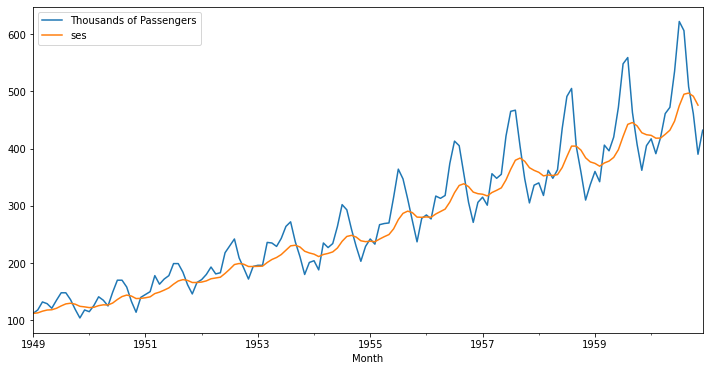

In [37]:
df[['Thousands of Passengers', 'ses']].plot(figsize=(12,6))

# Double Exponential Smoothing

In [0]:
from statsmodels.tsa.holtwinters  import ExponentialSmoothing

In [0]:
model_2 = ExponentialSmoothing(df['Thousands of Passengers'] , trend='add')

In [0]:
fitted_model_2 = model_2.fit()

In [0]:
df['des_add'] = fitted_model_2.fittedvalues.shift(-1)

In [50]:
df.head()

,Thousands of Passengers,6-month SMA,12-month SMA,EWMA-12,sma,ses,des,des_add
Month,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000,114.336233,114.336233
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077,120.336233,120.336233
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988,134.336233,134.336233
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836,131.336233,131.336233
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861,123.336233,123.336233


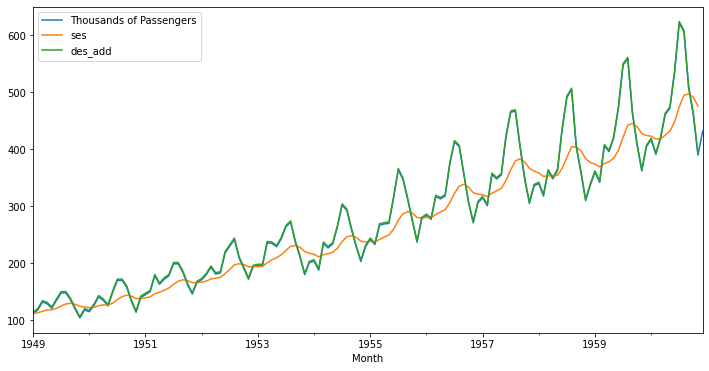

In [51]:
df[['Thousands of Passengers', 'ses' , 'des_add']].plot(figsize=(12,6))

In [52]:
df.shape

(144, 8)

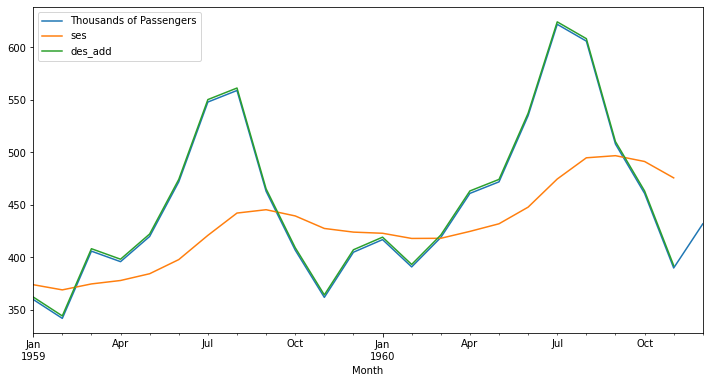

In [53]:
df[['Thousands of Passengers', 'ses' , 'des_add']].iloc[120:].plot(figsize=(12,6))

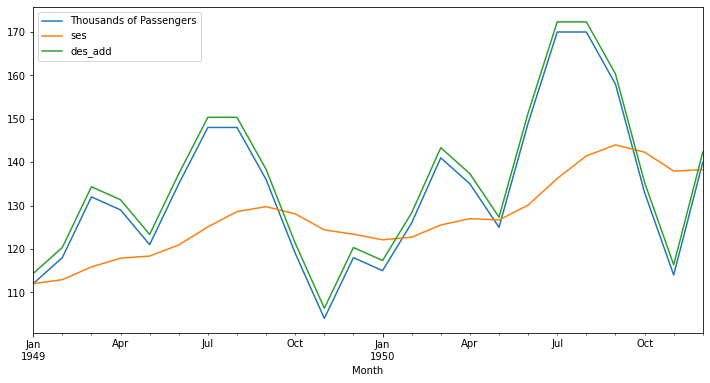

In [54]:
df[['Thousands of Passengers', 'ses' , 'des_add']].iloc[:24].plot(figsize=(12,6))

In [0]:
model_3 = ExponentialSmoothing(df['Thousands of Passengers'] , trend='mul')

In [0]:
fitted_model_3 = model_3.fit()

In [0]:
df['des_mul'] = fitted_model_3.fittedvalues.shift(-1)

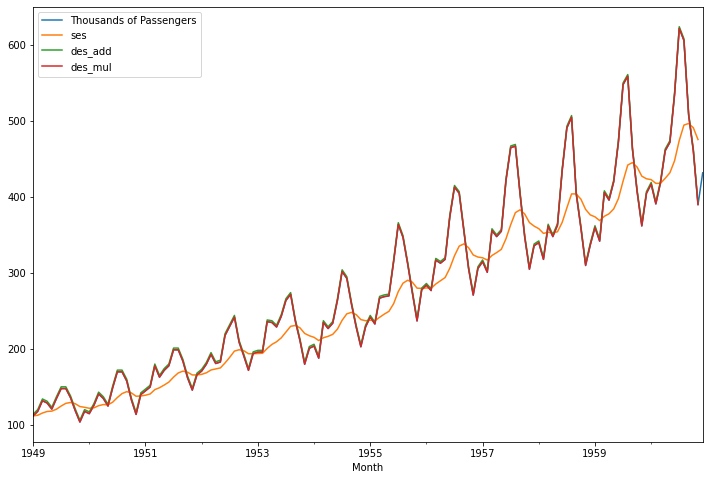

In [59]:
df[['Thousands of Passengers' , 'ses' , 'des_add' , 'des_mul']].plot(figsize=(12,8))

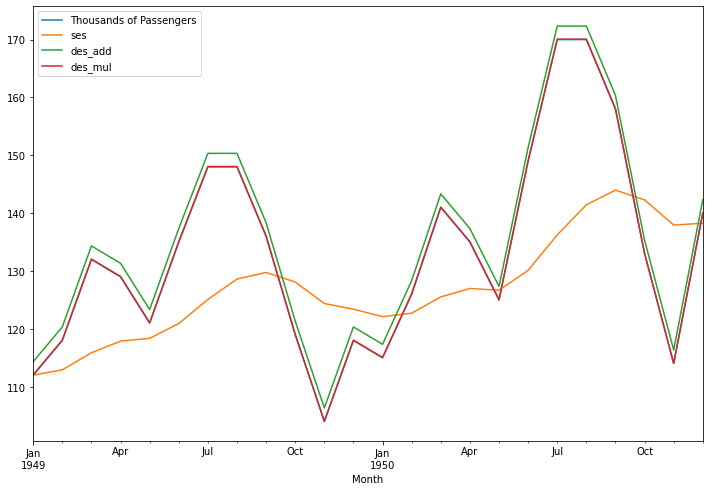

In [60]:
df[['Thousands of Passengers' , 'ses' , 'des_add' , 'des_mul']].iloc[:24].plot(figsize=(12,8))

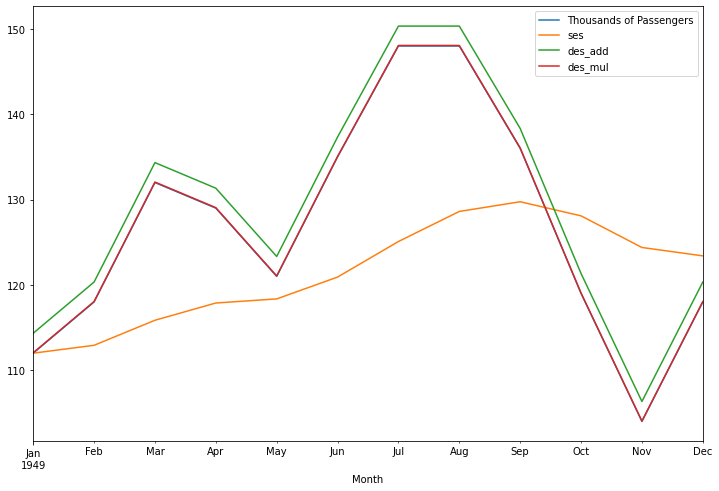

In [61]:
df[['Thousands of Passengers' , 'ses' , 'des_add' , 'des_mul']].iloc[:12].plot(figsize=(12,8))

# Triple Exponential Smoothing

In [0]:
model_4 = ExponentialSmoothing(df['Thousands of Passengers'] , trend = 'mul' , seasonal='mul' , seasonal_periods=12)

In [0]:
fitted_model_4 = model_4.fit()

In [0]:
df['tes'] = fitted_model_4.fittedvalues

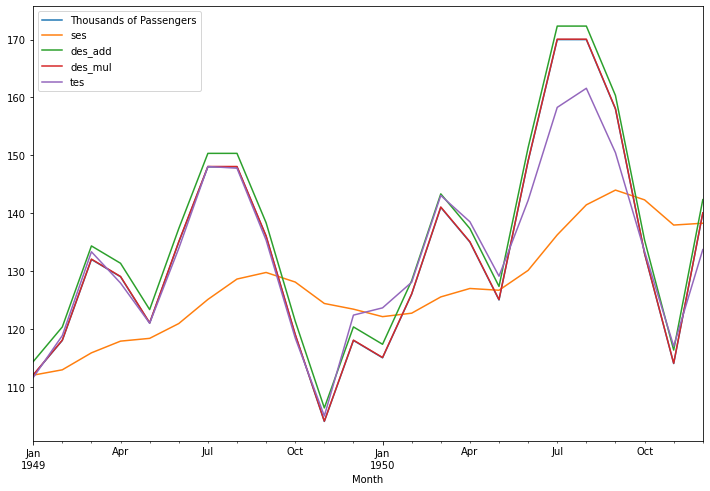

In [65]:
df[['Thousands of Passengers' , 'ses' , 'des_add' , 'des_mul' , 'tes']].iloc[:24].plot(figsize=(12,8))

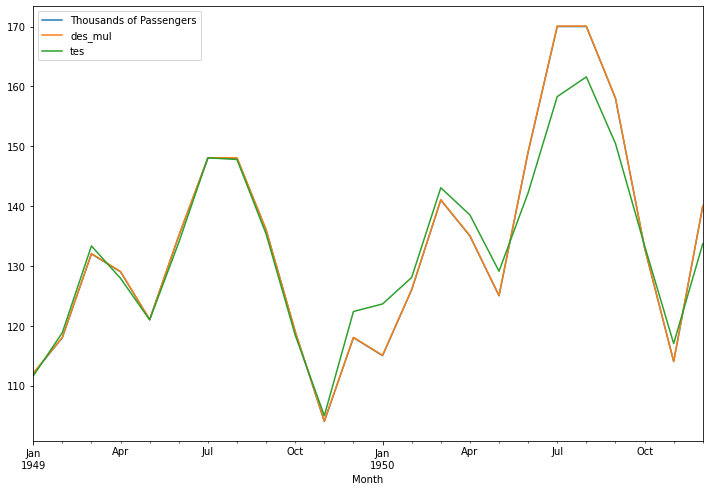

In [66]:
df[['Thousands of Passengers' , 'des_mul' , 'tes']].iloc[:24].plot(figsize=(12,8))

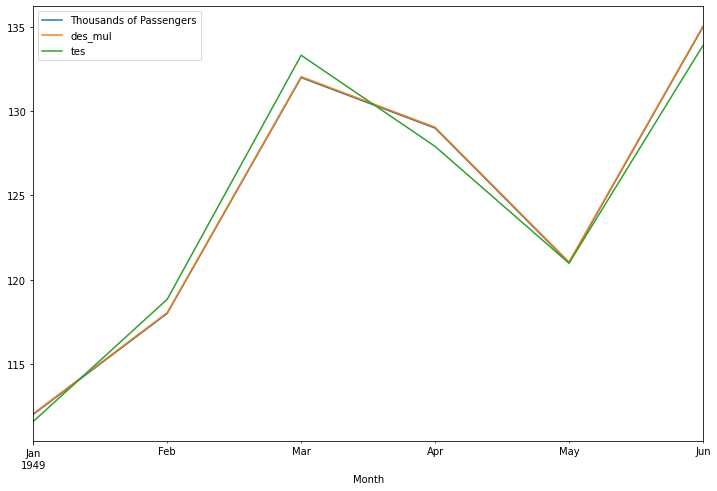

In [67]:
df[['Thousands of Passengers' , 'des_mul' , 'tes']].iloc[:6].plot(figsize=(12,8))